# Using Batch Gradient descent
- Problems : 
    Memory inefficient - Considers while dataset in one go | no for big data
    Convergence: Takes time | whole dataset is being looked at for single update -> SGD
- Solution:
    Solution - using batches of data to train the model

In [ ]:
## Implementation of batch gradient descent
epochs = 25
batch_size = 32
learning_rate = 0.01
n_samples = 320 # 10 batches

for epoch in range(epochs):
    for start_idx in range(0, n_samples, batch_size):
        end_idx = start_idx + batch_size
        # Get the current batch
        x_batch = X_train_tensor[start_idx:end_idx]
        y_batch = y_train_tensor[start_idx:end_idx]
        
        y_pred = model(x_batch)
        loss = loss_function(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [1]:
## Problems with this approach

# 1. Memory usage: If the dataset is large, it may not fit into memory.
# 2. Computation time: It may take a long time to compute the gradients for all samples.

# No standard interface for data
# No easy way to apply transformations
# Sampling is a challenge
# Batch management and parallelization

# overall we need a better way to manage this process to a reproducible manner

The Dataset and DataLoader class

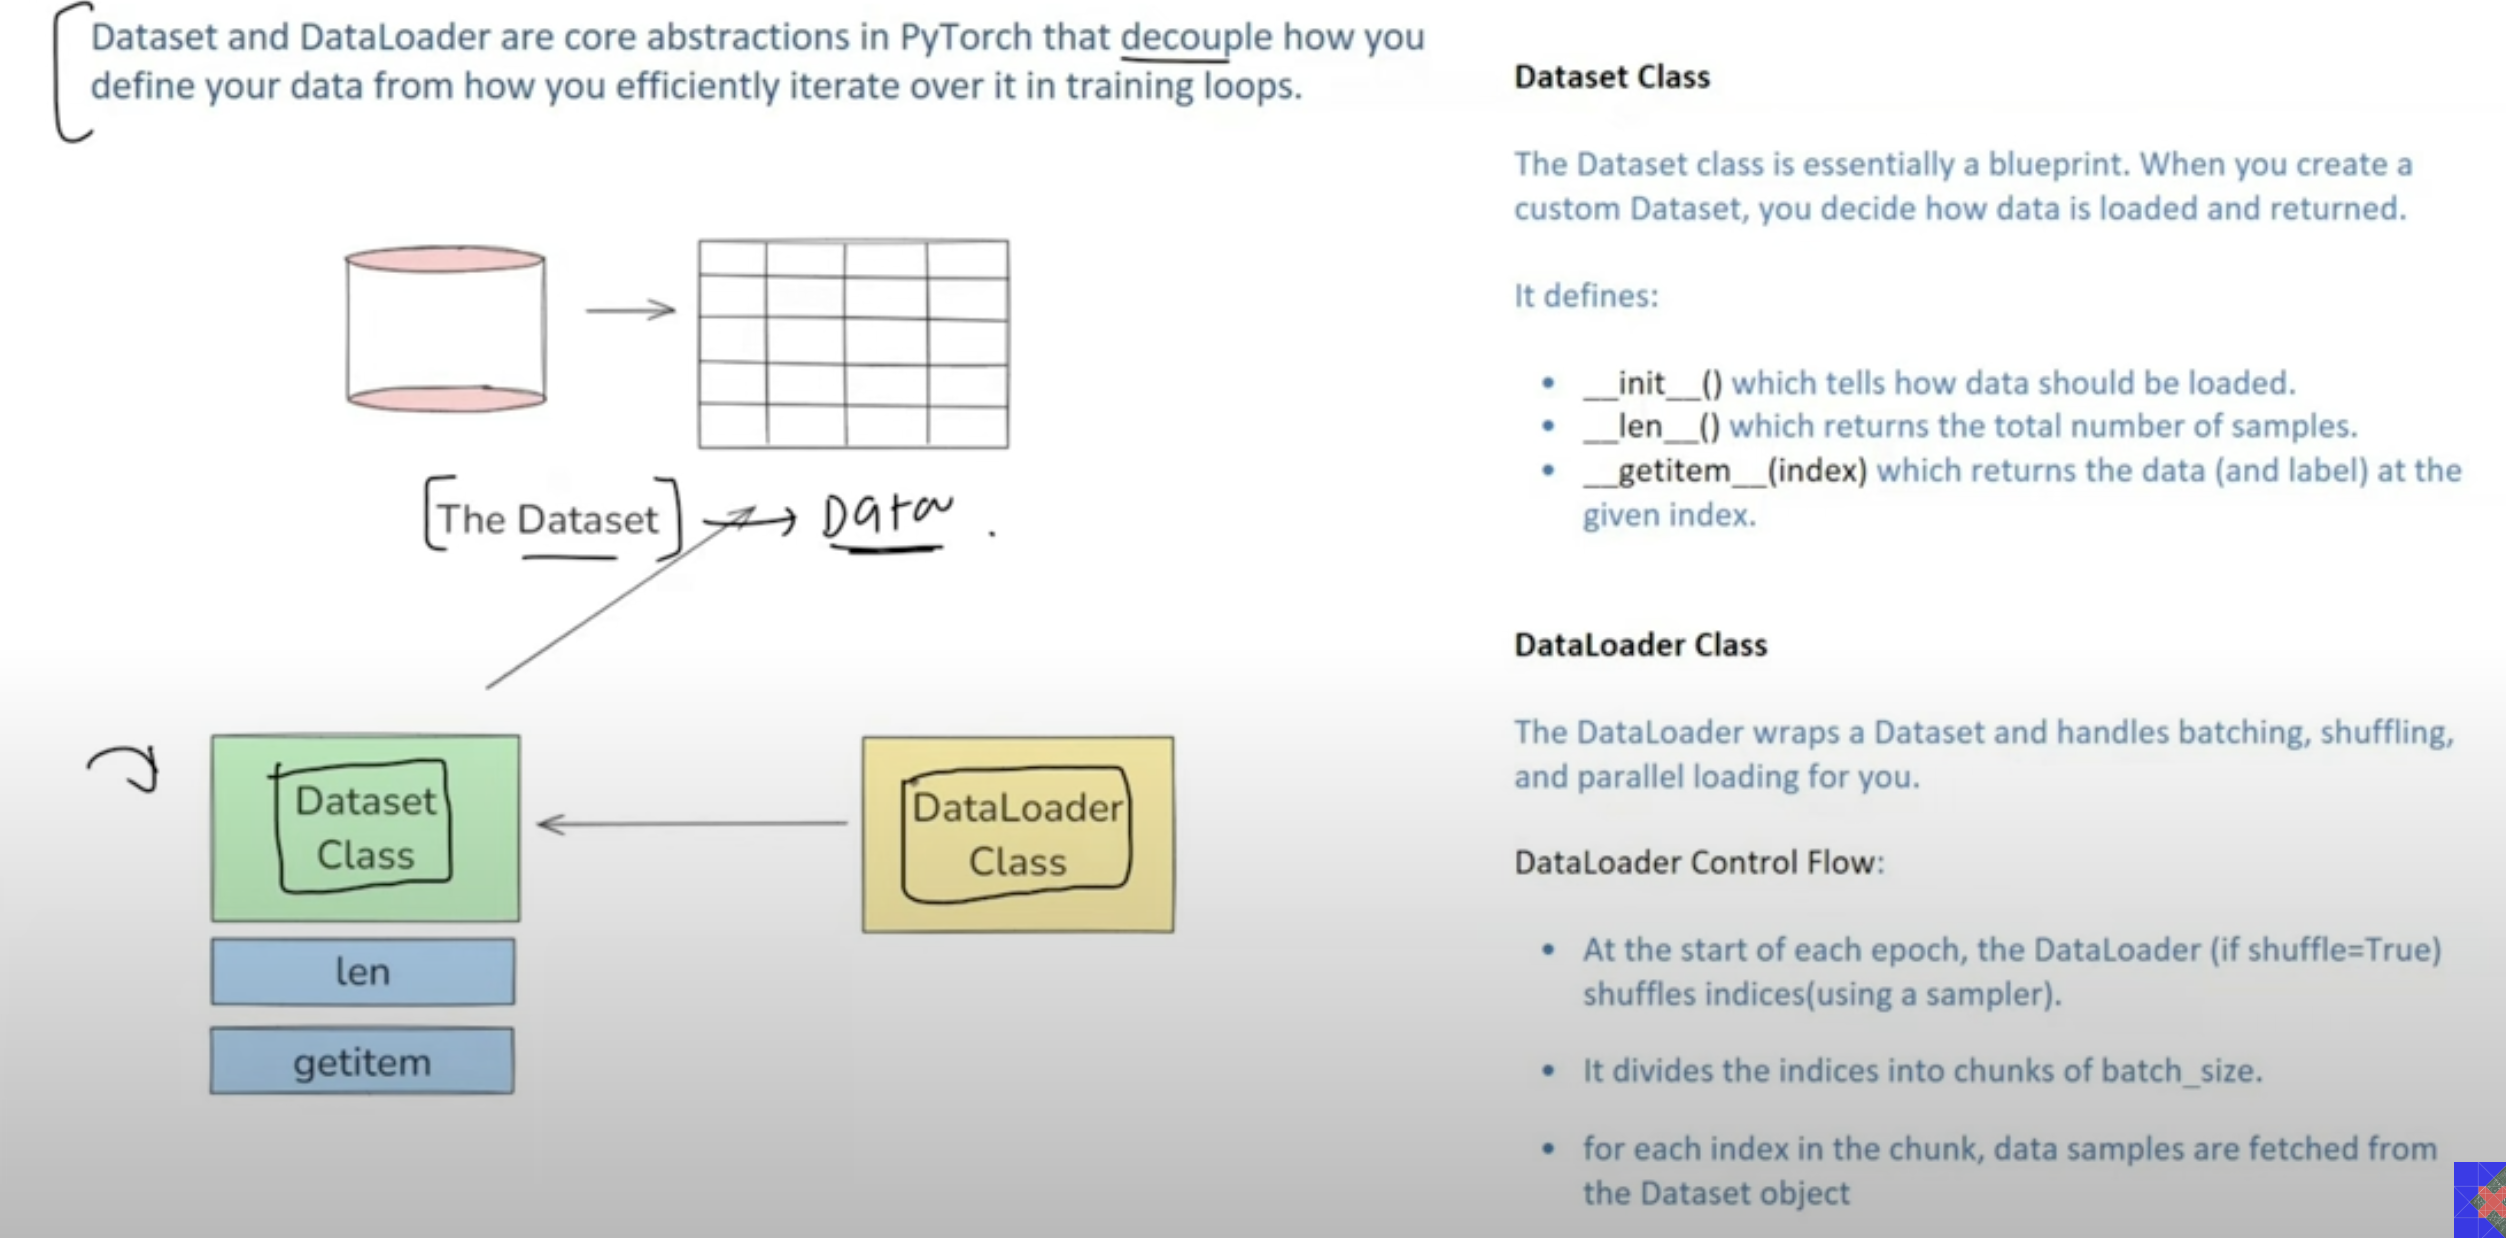

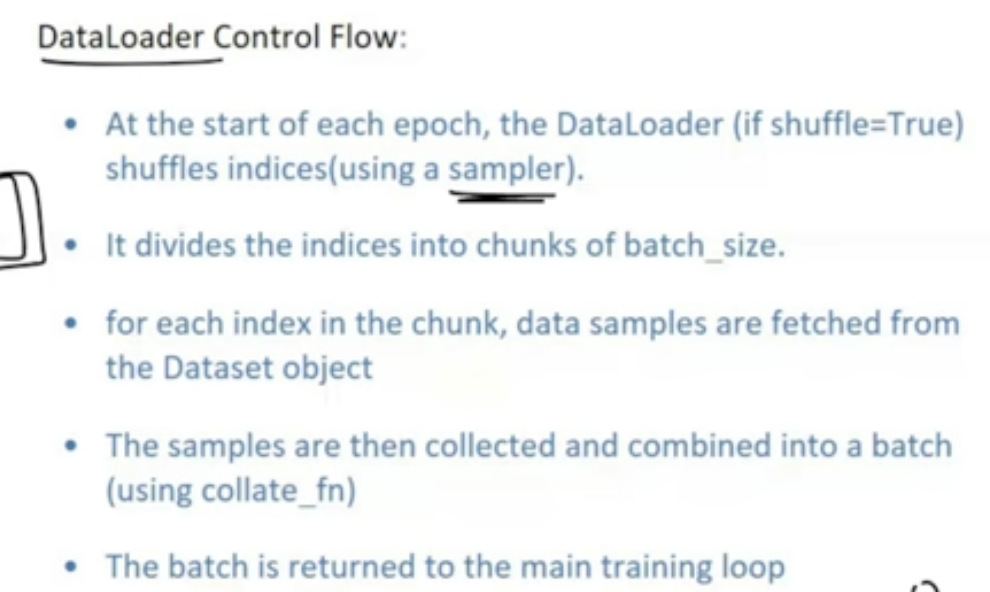

In [2]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Example usage
data = [[1, 2], [3, 4], [5, 6]]
labels = [0, 1, 0]
dataset = CustomDataset(data, labels)
print(dataset[0])  # Output: ([1, 2], 0)

([1, 2], 0)


In [3]:
from torch.utils.data import DataLoader

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Iterate through the DataLoader
for batch in dataloader:
    data, labels = batch
    print(data, labels)

[tensor([5, 3]), tensor([6, 4])] tensor([0, 1])
[tensor([1]), tensor([2])] tensor([0])


## Running a dataset

In [4]:
from sklearn.datasets import make_classification
import torch

X, y = make_classification(n_samples=10, 
                           n_features=2, 
                           n_informative=2,
                            n_redundant=0,
                           n_classes=2, 
                           random_state=42)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

In [6]:
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [8]:
dataset = CustomDataset(X, y)
dataset[2], len(dataset)

((array([-2.8953973 ,  1.97686236]), np.int64(0)), 10)

In [9]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True) #task is to extract shuffled batches with given batch size
for batch in dataloader: # iterable with (features, labels) as tuples in batch size
    features, labels = batch
    print(features, labels)
    print("-" * 40)

tensor([[-1.9629, -0.9923],
        [ 1.7273, -1.1858]], dtype=torch.float64) tensor([0, 1])
----------------------------------------
tensor([[ 1.0683, -0.9701],
        [ 1.8997,  0.8344]], dtype=torch.float64) tensor([1, 1])
----------------------------------------
tensor([[-0.7206, -0.9606],
        [-0.9382, -0.5430]], dtype=torch.float64) tensor([0, 1])
----------------------------------------
tensor([[-2.8954,  1.9769],
        [-0.5872, -1.9717]], dtype=torch.float64) tensor([0, 0])
----------------------------------------
tensor([[ 1.7774,  1.5116],
        [-1.1402, -0.8388]], dtype=torch.float64) tensor([1, 0])
----------------------------------------


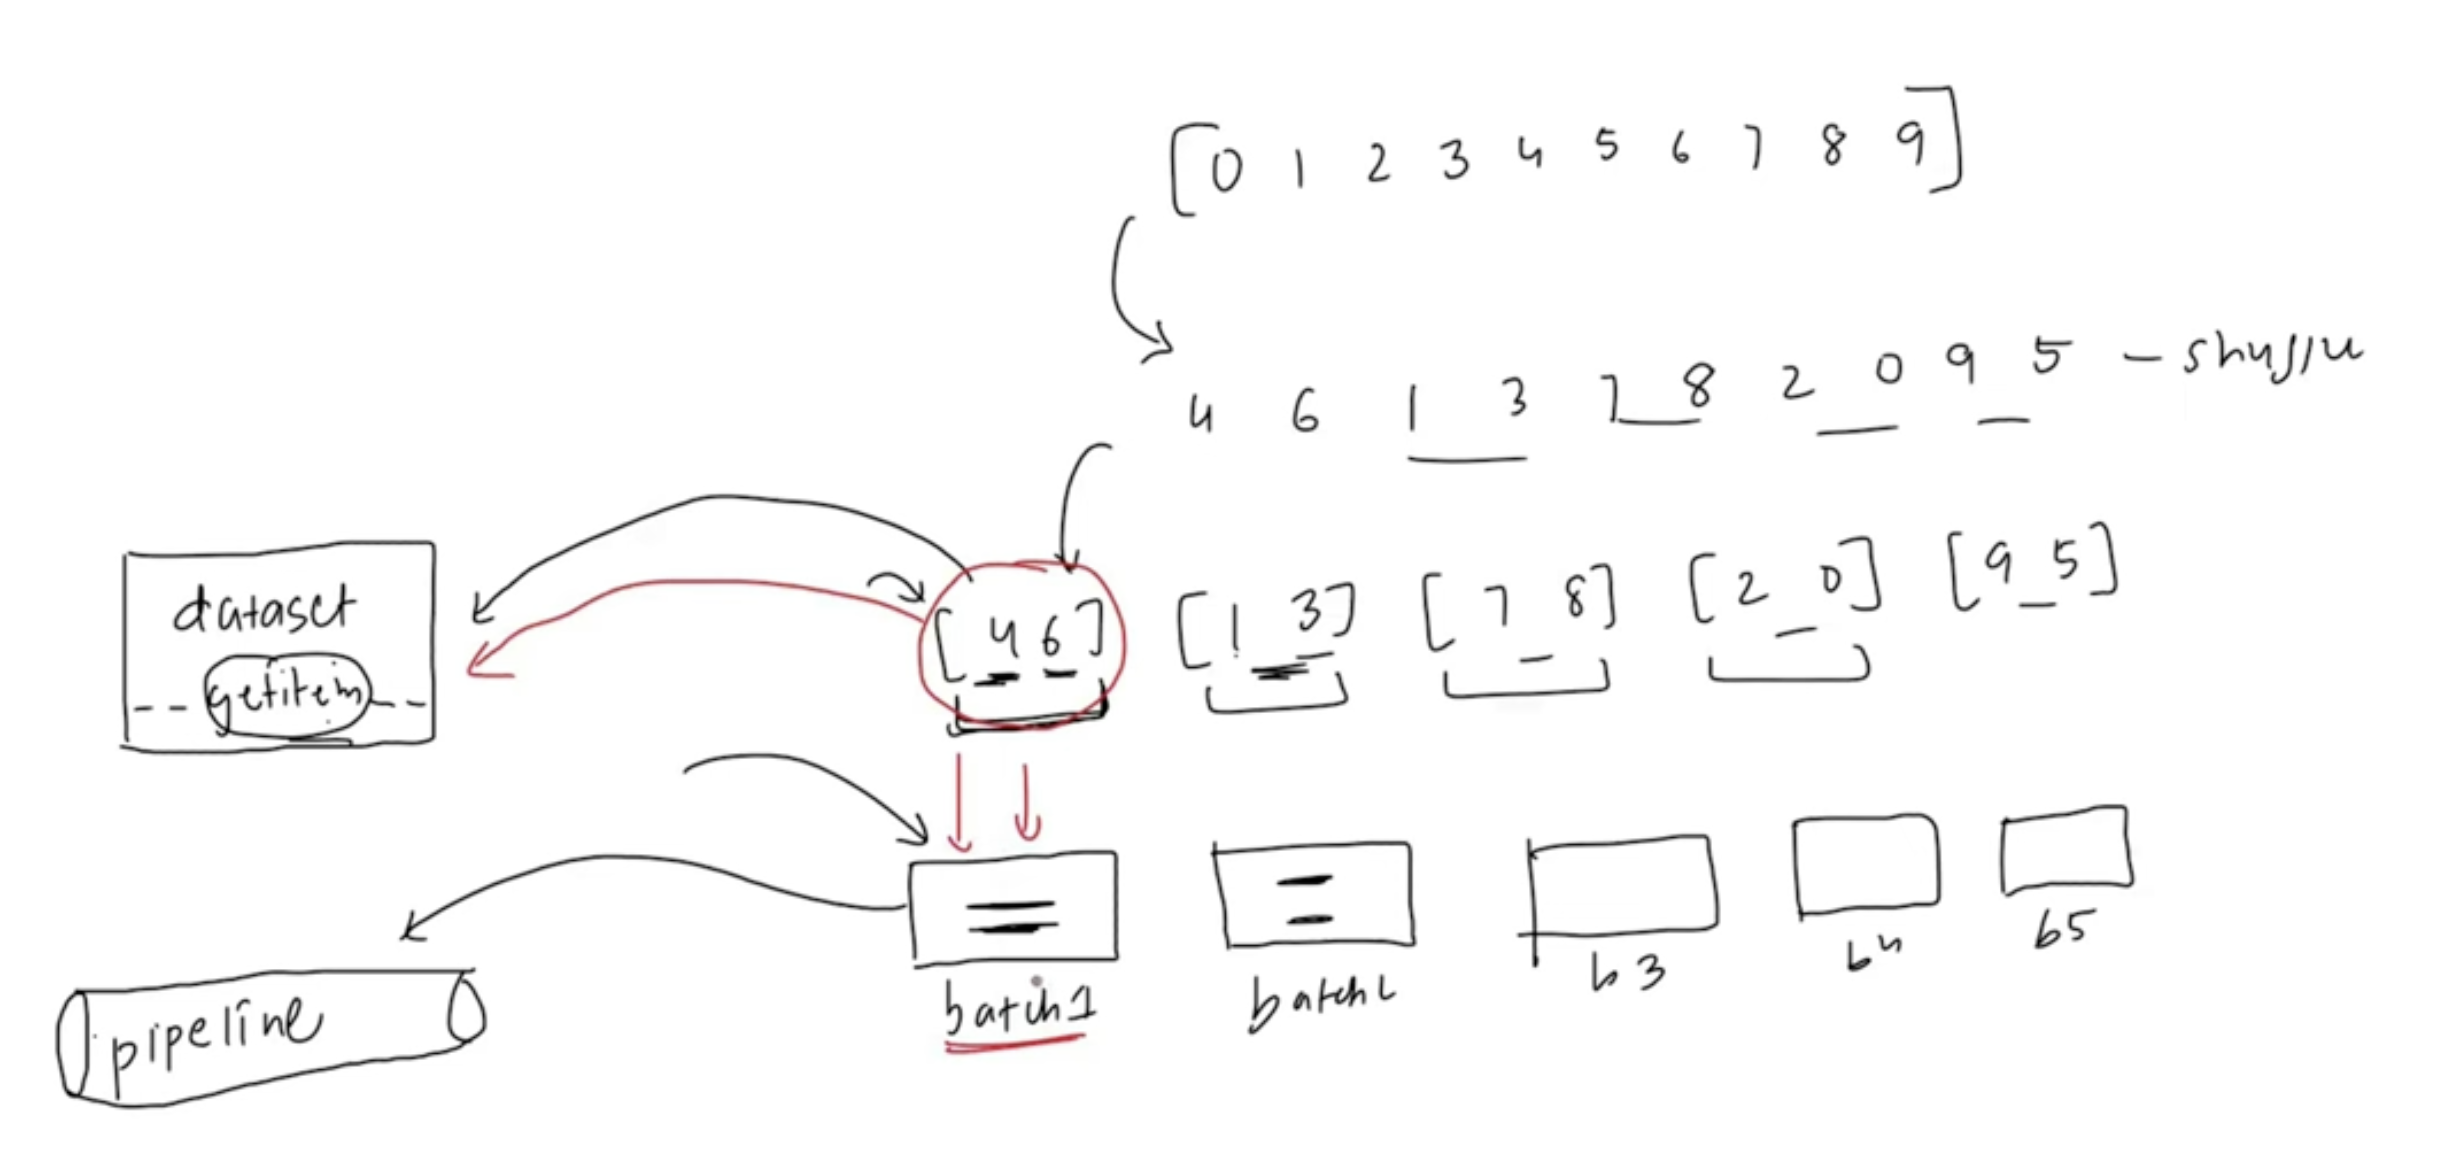


worked nodes can help in parallelization ; they will process data from each batch in parallel

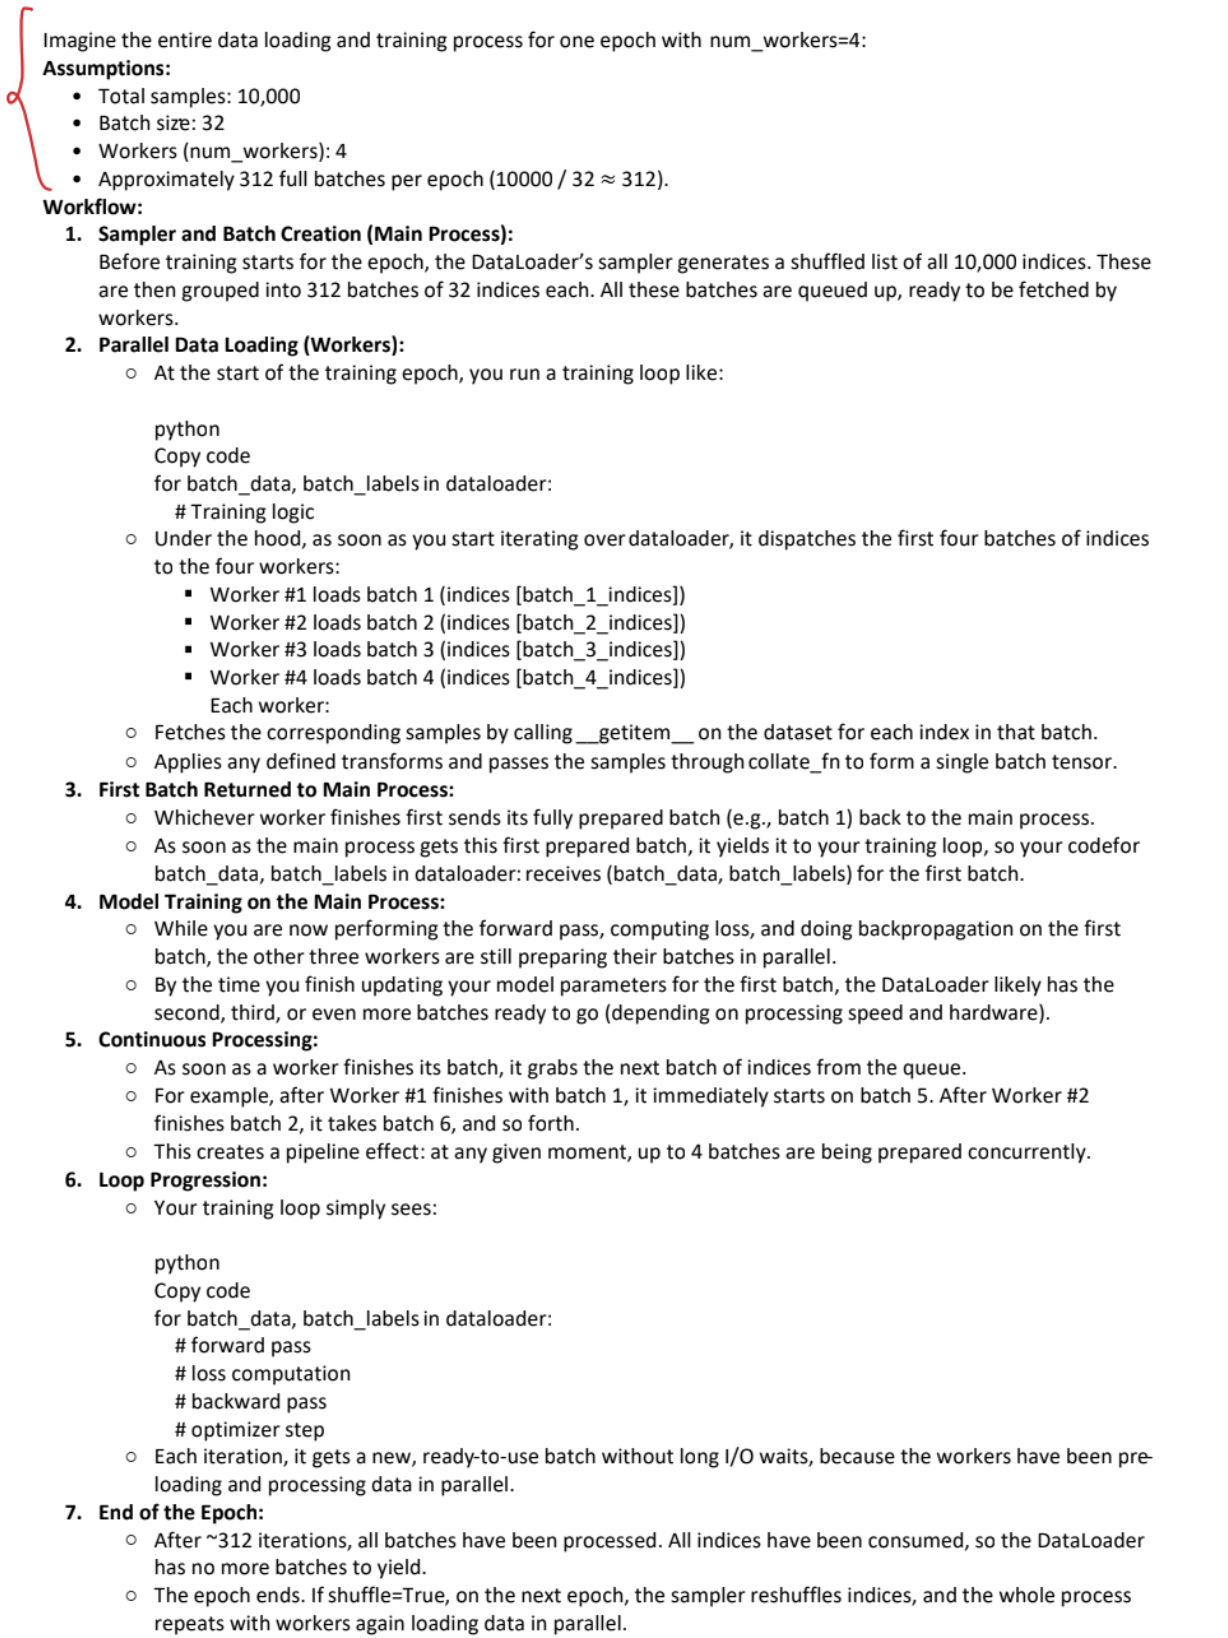

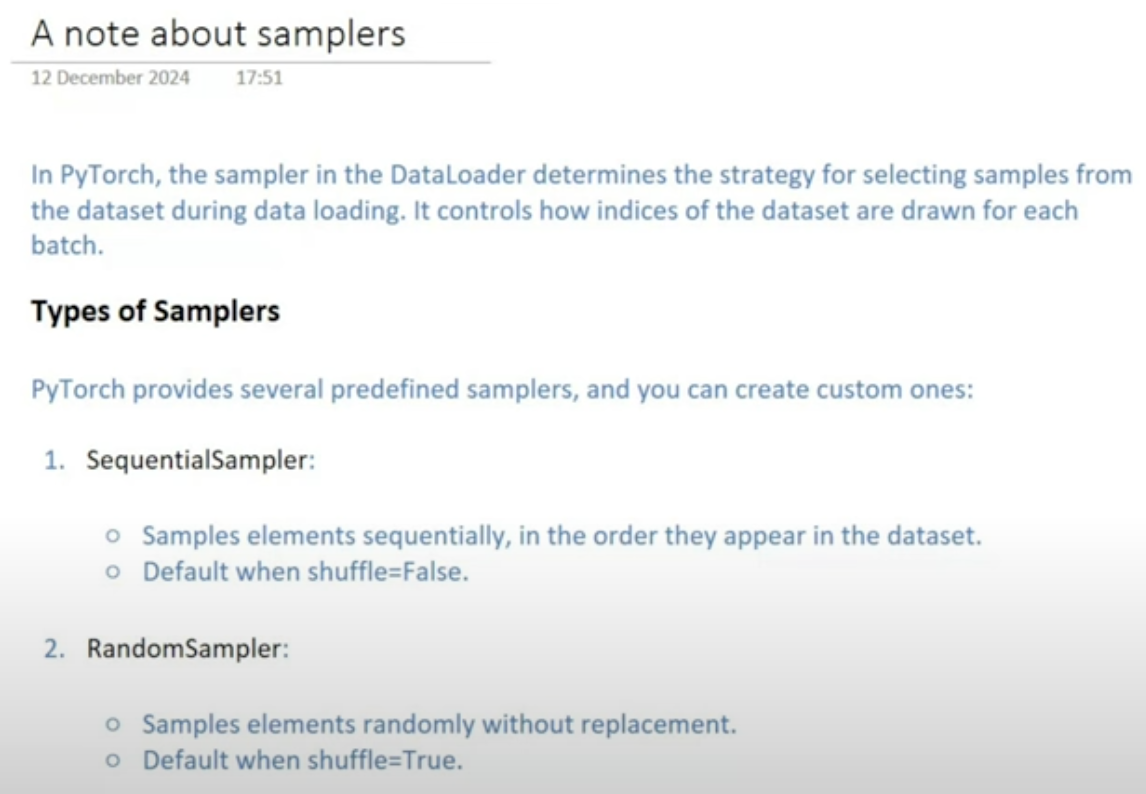


shuffle=False ; when time series
shuffle=True ; images
Custom dataset: imbalanced classficiation

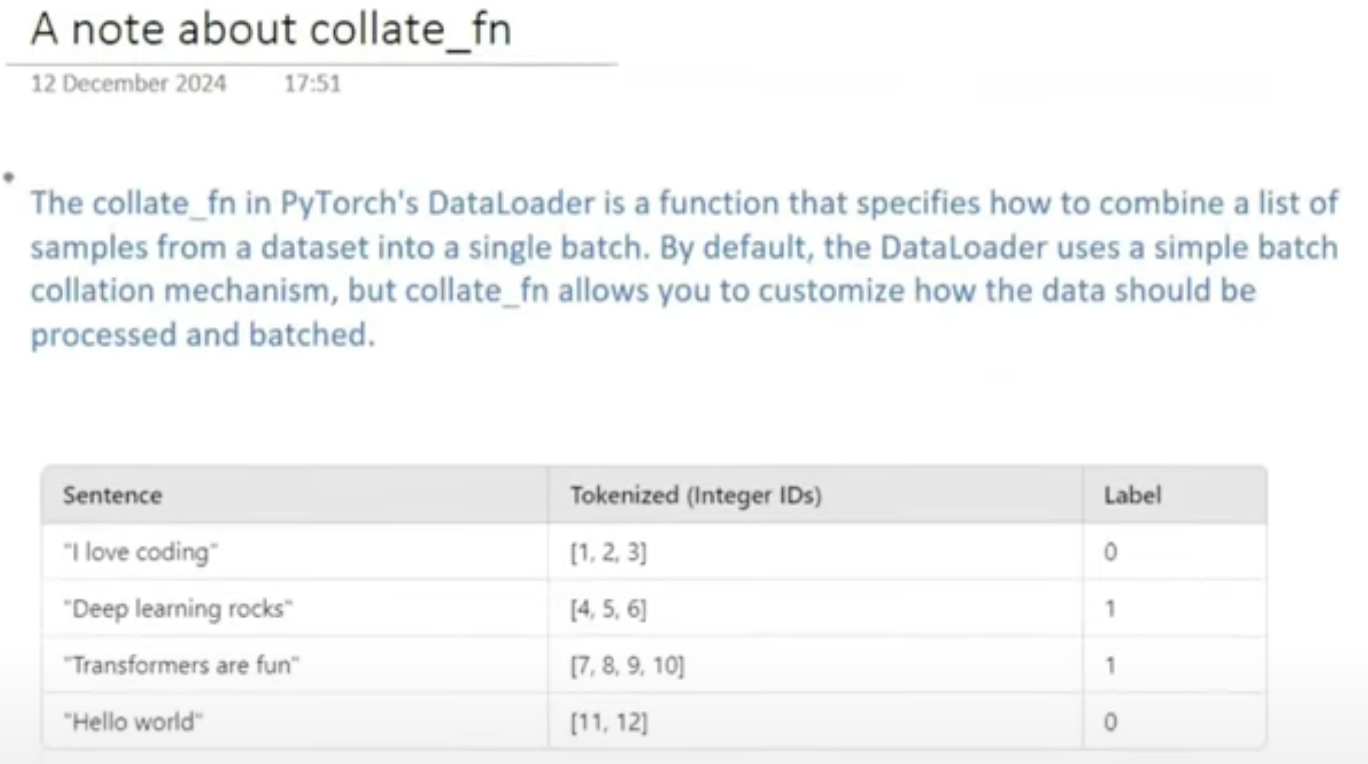

why a customer collate function?
- for cases such as normalising input data in case of textual information eg tokens via padding (front/ back)

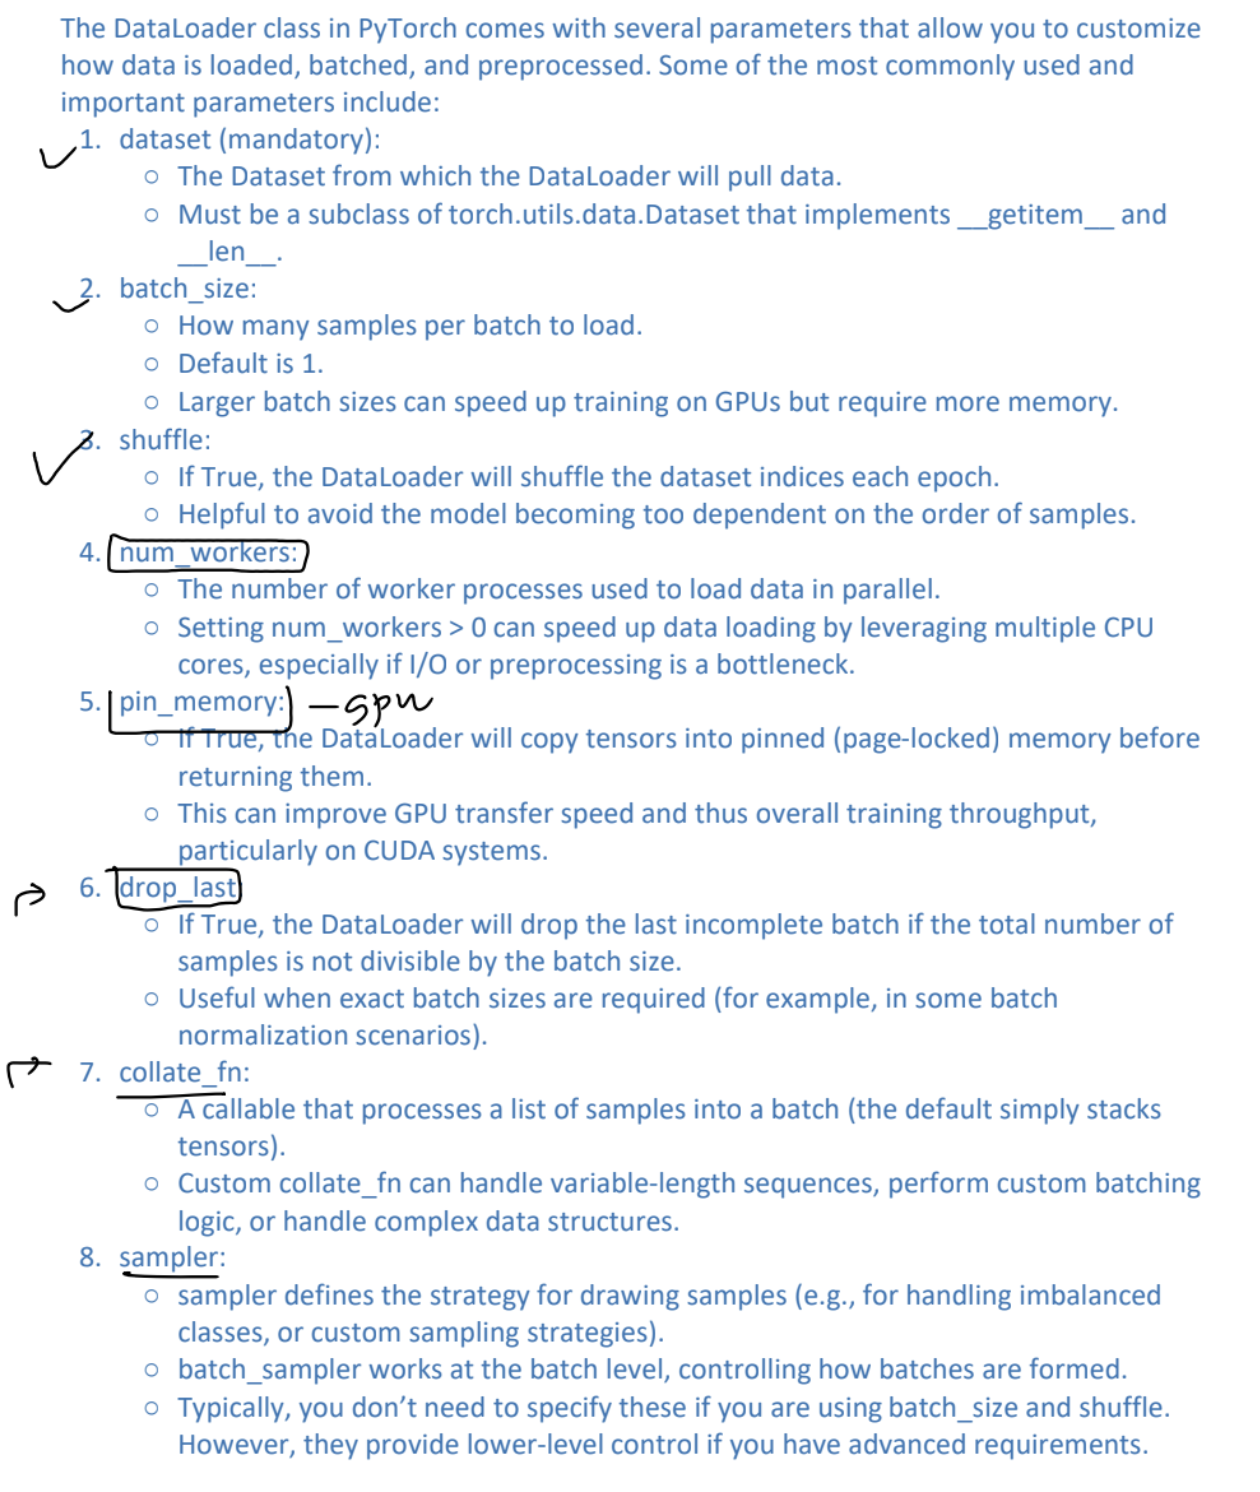

### Final codebase

In [10]:
import torch.nn as nn

class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

In [ ]:
learning_rate = 0.1
epochs = 25

# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loss function
loss_function = nn.BCELoss()

In [ ]:
# define loop
for epoch in range(epochs):

  for batch_features, batch_labels in train_loader:
    y_pred = model(batch_features)
    loss = loss_function(y_pred, batch_labels.view(-1,1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

In [ ]:
# Model evaluation using test_loader
model.eval()  # Set the model to evaluation mode
accuracy_list = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Forward pass
        y_pred = model(batch_features)
        y_pred = (y_pred > 0.8).float()  # Convert probabilities to binary predictions

        # Calculate accuracy for the current batch
        batch_accuracy = (y_pred.view(-1) == batch_labels).float().mean().item()
        accuracy_list.append(batch_accuracy)

# Calculate overall accuracy
overall_accuracy = sum(accuracy_list) / len(accuracy_list)
print(f'Accuracy: {overall_accuracy:.4f}')
